2. ProductId
3. Text Analysis - google cloud

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [40]:
review = pd.read_csv('../../amazon-fine-food-reviews/Reviews.csv')
review.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [41]:
review['Time'] = review['Time'].apply(datetime.datetime.fromtimestamp)

In [42]:
review['Year'] = review['Time'].apply(lambda x: x.year)

In [43]:
review.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27 08:00:00,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07 08:00:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012


### Product ID

In [44]:
df1 = review[['ProductId','Score','Year']]

In [45]:
df1.head(5)

,ProductId,Score,Year
0,B001E4KFG0,5,2011
1,B00813GRG4,1,2012
2,B000LQOCH0,4,2008
3,B000UA0QIQ,2,2011
4,B006K2ZZ7K,5,2012


In [46]:
df1.columns

Index(['ProductId', 'Score', 'Year'], dtype='object')

In [66]:
df1a = df1.groupby(['Year','ProductId']).agg({'Score': [np.size, np.mean]})  ###.Score.agg(['mean','count'])
df1a.columns = ['count', 'review_mean'] #for convinence
df1a.head

<bound method NDFrame.head of                  count  review_mean
Year ProductId                     
1999 0006641040      2     5.000000
     B00004CI84      1     5.000000
     B00004CXX9      2     5.000000
     B00004RYGX      1     5.000000
2000 B00002N8SM      1     5.000000
     B00002Z754      2     5.000000
     B00004CI84      8     4.375000
     B00004CXX9      9     4.444444
     B00004RAMX      1     5.000000
     B00004RYGX      8     4.375000
     B00004S1C5      2     5.000000
     B00004S1C6      1     5.000000
2001 0006641040      1     5.000000
     B00004CI84      3     3.333333
     B00004CXX9      3     2.666667
     B00004RYGX      3     3.333333
     B00004S1C6      3     4.333333
2002 0006641040      2     5.000000
     B00004CI84     14     4.500000
     B00004CXX9     14     4.500000
     B00004RYGX     14     4.500000
     B00004S1C6      3     5.000000
     B00005IX96      3     5.000000
     B00005IX97      3     5.000000
     B00005IX98      3     5.00000

In [48]:
df1a.columns

Index(['count', 'review_mean'], dtype='object')

In [49]:
df1b = df1a.sort_values(['Year','count'],ascending=False).groupby('Year').head(5)
df1b = df1b.sort_values(['Year'],ascending=True)

In [50]:
df1b.tail(10)

count  review_mean
Year ProductId                     
2011 B004ZIER34    309     3.504854
     B004JGQ15E    294     4.204082
     B004BKLHOS    293     4.283276
     B004U49QU2    290     3.327586
     B003XDH6M6    293     4.023891
2012 B005ZBZLT4    480     4.372917
     B002IEZJMA    483     3.592133
     B002IEVJRY    483     3.853002
     B006MONQMC    491     3.380855
     B007JFMH8M    913     4.582694

In [51]:
#Get list of unique Product ID
list = df1b.index.values.tolist()
np.shape(list)

(69, 2)

In [52]:
df1c = df1b.groupby('ProductId').agg('sum')
df1c = df1c.sort_values('count',ascending=False)
df1c.head(10)

,count,review_mean
ProductId,,
B007JFMH8M,913,4.582694
B006MONQMC,491,3.380855
B002IEVJRY,483,3.853002
B002IEZJMA,483,3.592133
B005ZBZLT4,480,4.372917
B0090X8IPM,418,3.830144
B003GTR8IO,418,3.830144
B001LGGH40,337,3.575668
B001LG940E,332,3.689759


In [68]:
xx = np.array(list)
ID_list = np.unique([list[x][1] for x in range(69)])

In [69]:
len(xx)

69

In [54]:
ID_list = np.unique([list[x][1] for x in range(69)])
ID_list

array(['0006641040', 'B00002Z754', 'B00004CI84', 'B00004CXX9',
       'B00004RYGX', 'B00004S1C5', 'B00004S1C6', 'B00005U2FA',
       'B00006L2ZT', 'B00008RCMI', 'B0001ES9F8', 'B0001ES9FI',
       'B0002TA77A', 'B0007NOWMM', 'B000A28TJ2', 'B000AQFQC6',
       'B000AQJRWG', 'B000ENUC3S', 'B000FI4O90', 'B000REI2X6',
       'B0018KLPFK', 'B001BCVY4W', 'B001BCVY9W', 'B001BCXTGS',
       'B001EO5U3I', 'B001EQ55RW', 'B001EQ55ZO', 'B001LG940E',
       'B001LG945O', 'B001LGGH40', 'B001LGGH54', 'B001OCKIP0',
       'B0029XLH4Y', 'B002IEVJRY', 'B002IEZJMA', 'B003GTR8IO',
       'B003XDH6M6', 'B004BKLHOS', 'B004JGQ15E', 'B004U49QU2',
       'B004ZIER34', 'B0052OUAOK', 'B005ZBZLT4', 'B006MONQMC',
       'B006N3HZ6K', 'B007JFMH8M', 'B007TJGY46', 'B008J1HO4C',
       'B0090X8IPM'], dtype='<U10')

In [55]:
ID_list[1]

'B00002Z754'

In [56]:
word_dict = {ID_list[i]: i+1 for i in range(49)}

In [57]:
word_dict['B002IEZJMA']

35

df1b.describe()

df1c = pd.DataFrame({'ID': xx[:, 1], 'Year': xx[:, 0]})
#df1c['Score_mean'] = df1b['review_mean'] 
#"TypeError: incompatible index of inserted column with frame index"

df1c['Score'] = score
df1c.head(10)

In [58]:
score = np.array(df1b['review_mean']).reshape(-1,1)  # reshape from (69,) to (69, 1)
counts =np.array(df1b['count']).reshape(-1,1)

In [59]:
xx[1][1]

'0006641040'

In [60]:
xxx = [word_dict[xx[i][1]] for i in range(69)]
yyy = [xx[i][0] for i in range(69)]

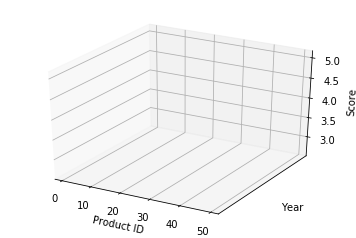

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = xxx
y = yyy
z = score


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Product ID')
ax.set_ylabel('Year')
ax.set_zlabel('Score')

plt.show()

In [63]:
#It's a little pointless to plot the average score in a 3d graph...so let' use count

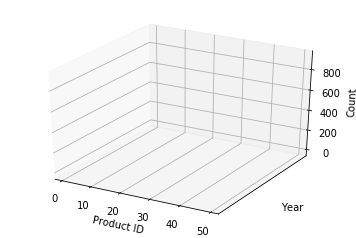

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = xxx
y = yyy
z = counts

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Product ID')
ax.set_ylabel('Year')
ax.set_zlabel('Count')

plt.show()

In [4]:
#All collors avalible in Python!
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


### Words Analysis (TBC)
- most frequently used in general
- most frequently used with good/bad scores

In [20]:
df3 = review[['Score','Text']]
df3['Text'] = df3['Text'].apply(lambda x: str.split(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df3.head(5)

,Score,Text
0,5,"[I, have, bought, several, of, the, Vitality, ..."
1,1,"[Product, arrived, labeled, as, Jumbo, Salted,..."
2,4,"[This, is, a, confection, that, has, been, aro..."
3,2,"[If, you, are, looking, for, the, secret, ingr..."
4,5,"[Great, taffy, at, a, great, price., There, wa..."


In [ ]:
df3a = df3.groupby(['Score']).sum()

In [26]:
print(df4.isnull().any())

Score      False
Summary     True
dtype: bool


In [20]:
df4 = review[['Score','Summary']]
df4['Summary'] = df4['Summary'].apply(lambda x: str.split(x))

TypeError: descriptor 'split' requires a 'str' object but received a 'float'

In [27]:
print(df4.isnull().any())

Score      False
Summary     True
dtype: bool


In [34]:
df4.where(df4.notnull(), 'na')
df4['Summary'] = df4['Summary'].apply(lambda x: str.split(x))

TypeError: descriptor 'split' requires a 'str' object but received a 'float'